In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Specify the parameters
directory = 'exp_95/acc_comp/'
smoothing_factor = 0.5 #9
x_min = 0
x_max = 0.2
x_steps = 21
x_label = "Occluded Area"
y_min = 0.0
y_max = 1.
y_label = "Accuracy"
legend_pos = "upper right" #upper lower
three_in_a_row = False

# DO NOT CHANGE! PLEASE!!!
if three_in_a_row:
    text_size = 22
    legend_size = 19 # is sometimes 21!
    tick_size = 19
    line_width_plot = 2.3
else:
    text_size = 20 #18 #16
    legend_size = 17 #16 #15
    tick_size = 18 #16 #14
    line_width_plot = 2 # 1.75 #1.5

In [3]:
# Function to perform exponential smoothing
def exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]  # The first data point remains the same
    for i in range(1, len(data)):
        smoothed_value = (1-alpha) * data[i] + alpha * smoothed_data[i-1]
        smoothed_data.append(smoothed_value)
    return smoothed_data

In [4]:
# Remove the result file if it already exists
output_filename = os.path.join(directory, 'result.csv')
if os.path.exists(output_filename):
    os.remove(output_filename)

# Get a list of CSV files in the specified directory
csv_files = sorted([filename for filename in os.listdir(directory) if filename.endswith('.csv')])
print(csv_files)

# Initialize the combined table with the first CSV file
combined_table = pd.read_csv(os.path.join(directory, csv_files[0]), sep=',', usecols=[0])

# Iterate over the remaining CSV files and append the second column
for csv_file in csv_files:
    data = pd.read_csv(os.path.join(directory, csv_file), sep=',', usecols=[2])
    combined_table = pd.concat([combined_table, data.iloc[:, 0]], axis=1)


# Save the combined table as result.csv with the name of the directory
output_filename = os.path.join(directory, 'result.csv')
combined_table.to_csv(output_filename, index=False)


# Read the data from the CSV file
data = pd.read_csv(output_filename, header=None)


# Extract the columns and smooth the data
x = np.linspace(start=x_min, stop=x_max, num=x_steps) #data[0] + 1
print(x)
data1 = data[1]
data1 = exponential_smoothing(data1.values, smoothing_factor)

data2, data3, data4, data5 = None, None, None, None
if data.shape[1] >= 3:
    data2 = data[2]
    data2 = exponential_smoothing(data2.values, smoothing_factor)
if data.shape[1] >= 4:
    data3 = data[3]
    data3 = exponential_smoothing(data3.values, smoothing_factor)



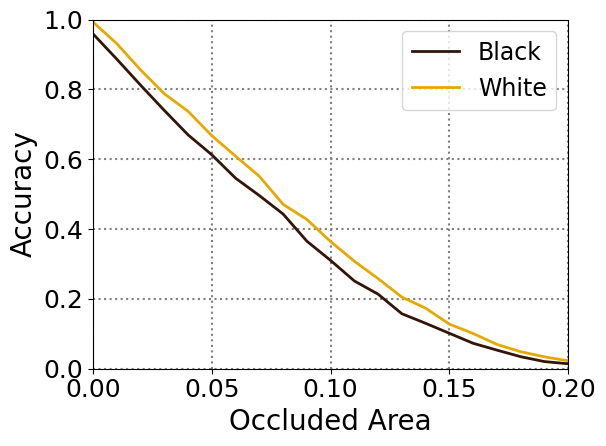

In [ ]:
# Plotting
line1, = plt.plot(x, data1, label='Black', linewidth=line_width_plot,color="#331507") #np.divide(data1,data1) # brown:  # yellow: 

if data2 is not None:
    line2, = plt.plot(x, data2, label='White', linewidth=line_width_plot, color="#e6a902")

if data3 is not None:
    line3, = plt.plot(x, data3, label='Balanced', linewidth=line_width_plot)


# Set the x and y axis limits
plt.xlim(x[0], x[-1])
plt.ylim(y_min, y_max)
plt.rc('font', size=tick_size)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# Axes labels and legend
plt.xlabel(x_label, fontsize=text_size)
plt.ylabel(y_label, fontsize=text_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.legend(fontsize=legend_size, loc=legend_pos)

# plt.yticks(np.arange(0.6, 0.801, 0.025))
# Create a legend for the first line.
# first_legend = plt.legend(handles=[line1, line2, line3], loc='lower left', fontsize=legend_size)

# Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(first_legend)

# plt.legend(handles=[line4, line5], loc='lower right',fontsize=legend_size)

# Display the plot
plt.tight_layout()
plt.grid(color='gray', linestyle=':', linewidth=0.75*line_width_plot)
plt.savefig(os.path.join(directory, 'result.png'), dpi=150)
plt.show()